# Key papers

This Jupyter Notebook can be used to perform basic publication analysis for a science branch. 

**Features:**

1. Subtopic analysis based on co-citation graph clustering:
    * Chord diagram for co-citation graph
    * Comparison of subtopics by size
    * Timeline of each subtopic
    * Extraction of 1,2,3-grams describing each subtopic
2. Detection of highlight papers:
    * Top cited papers overall
    * Detection of most cited papers for each year
    * Detection of papers with max relative citation gain for each year
3. Citation dynamics visualization for highlight papers
4. Subtopic evolution tracking based on co-citation graph clustering for different time periods

## Getting Started

1. Define the `SEARCH_TERMS` variable in the cell below with a list of keywords that describe the science branch of your interest.
2. Run all cells & see the results.

In [1]:
SEARCH_TERMS = ['dna', 'methylation', 'clock']

## Publication Analysis

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
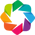

Loading BokehJS ...

2019-07-26 11:16:49,906 DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2019-07-26 11:16:49,912 DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
import logging

from bokeh.plotting import show, output_notebook
from matplotlib import pyplot as plt

from keypaper.pm_loader import PubmedLoader
from keypaper.ss_loader import SemanticScholarLoader
from keypaper.analysis import KeyPaperAnalyzer
from keypaper.visualization import Plotter

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(levelname)s: %(message)s')
output_notebook()
%matplotlib inline

In [3]:
analyzer = KeyPaperAnalyzer(PubmedLoader(test=False))
log = analyzer.launch(*SEARCH_TERMS)

2019-07-26 11:16:49,995 INFO: TODO: handle queries which return more than 10000 items
2019-07-26 11:16:50,962 INFO: Found 310 articles about ('dna', 'methylation', 'clock')
2019-07-26 11:16:50,962 INFO: Loading publication data
2019-07-26 11:16:50,963 INFO: Creating pmids table for request with index.
2019-07-26 11:16:51,014 INFO: Found 309 publications in the local database

2019-07-26 11:16:51,015 INFO: Started loading citation stats
2019-07-26 11:16:51,037 INFO: Done loading citation stats
2019-07-26 11:16:51,050 INFO: Loaded citation stats for 209 of 310 articles.
Others may either have zero citations or be absent in the local database.
2019-07-26 11:16:51,054 INFO: Calculating co-citations for selected articles
2019-07-26 11:16:51,121 INFO: Loaded 615 lines of citing info
2019-07-26 11:16:51,122 INFO: Found 8987 co-cited pairs of articles
2019-07-26 11:16:51,123 INFO: Aggregating co-citations
2019-07-26 11:16:51,153 INFO: Filtering top 100000 of all the co-citations
2019-07-26 11:

2019-07-26 11:16:55,422 INFO: 5: foundation:0.006,predisposition:0.006,medulloblastoma:0.006,epic:0.006,sensitivity:0.005,autism:0.005,telomerase:0.005,prmt5:0.005,mdma:0.005,quality:0.005,pollution:0.004,embryo:0.004,combination:0.004,preterm:0.004,chronotype:0.004,heat:0.004,adolescent:0.004,carcinoma:0.004,repair:0.004,genotype:0.004,dnmt1o:0.004,pace:0.004,technique:0.003,acid:0.003,chip:0.003,endodormancy:0.003,horvaths:0.003,mbshh:0.003,recipient:0.003,commitment:0.003,step:0.003,sevoflurane:0.003,molecule:0.003,dormancy:0.003,ass1:0.003,rapa:0.003,transplantation:0.003,allergy:0.003,asthma:0.003,potential:0.003,kinase:0.003,total:0.003,extension:0.003,rltl:0.003,levine:0.003,midchildhood:0.003,rdna:0.003,epimutation:0.003,coleoptiles:0.003,re-oxygenation:0.003,haemoglobin:0.003,practice:0.003,testing:0.003,resemblance:0.003,dyslipidemia:0.003,organization:0.002,search:0.002,rejuvenation:0.002,code:0.002,progress:0.002,oxygen:0.002,motif:0.002,oomycetes:0.002,focus:0.002,specific

In [4]:
plotter = Plotter(analyzer)

## Subtopics a.k.a. Clusters in the Co-citation Graph

In [5]:
show(plotter.chord_diagram_components())

2019-07-26 11:17:00,184 INFO: Visualizing components with Chord diagram


In [6]:
show(plotter.component_size_summary())

2019-07-26 11:17:00,465 INFO: Summary component detailed info visualization


In [7]:
for p in plotter.subtopic_timeline_graphs():
    show(p)

2019-07-26 11:17:00,668 INFO: Per component detailed info visualization


## Top Cited Papers Overall

In [8]:
show(plotter.top_cited_papers())

## Top Cited Papers for Each Year

In [9]:
show(plotter.max_gain_papers())

2019-07-26 11:17:01,452 INFO: Different colors encode different papers


## Top by Relative Gain for Each Year

In [10]:
show(plotter.max_relative_gain_papers())

2019-07-26 11:17:01,512 INFO: Top papers in relative gain for each year
2019-07-26 11:17:01,513 INFO: Relative gain (year) = Citation Gain (year) / Citations before year
2019-07-26 11:17:01,513 INFO: Different colors encode different papers


## Citation per Year Dynamics

In [11]:
plotter.article_citation_dynamics()

2019-07-26 11:17:01,573 INFO: Choose ID to get detailed citations timeline for top cited / max gain or relative gain papers


In [12]:
analyzer.df

id                                              title  \
0    11032969  Crisis periods and apoptotic commitment: death...   
1    11820819  Regulation of stage-specific nuclear transloca...   
2    14577056                                     Genes of aging   
3    15779908  Structural aspects of RecA-dependent homologou...   
4    15790588  Deregulated expression of the PER1, PER2 and P...   
5    15860628  PERIOD1-associated proteins modulate the negat...   
6    15941485  Stability of colon stem cell methylation after...   
7    15975143  Age-related human small intestine methylation:...   
8    16314580  Counting human somatic cell replications: meth...   
9    16582617  Counting divisions in a human somatic cell tre...   
10   16683245  Promoter methylation in circadian genes of end...   
11   16717091  The polycomb group protein EZH2 is required fo...   
12   16999817  Downregulation of circadian clock genes in chr...   
13   17029560  Heterogeneous genomic molecular clocks in prim...   
14   17030450            A circadian model for viral persistence   
15    1722018                DNA methylation and cellular ageing   
16   17562333  Reconstructing cellular lineages in endometria...   
17   17672908  Lack of increases in methylation at three CpG-...   
18   18358604  A pilot study for circadian gene disturbance i...   
19   18396448  Clocks and switches: bacterial gene regulation...   
20   18410448  Inferring relative numbers of human leucocyte ...   
21   18483325  DNA methylation in benign breast epithelium in...   
22   18676844  RUNX3 methylation reveals that bladder tumors ...   
23   19031430  Inferring human stem cell behaviour from epige...   
24   19296127  Disturbance of circadian gene expression in br...   
25    1943146  Quantitative genetic variation and development...   
26   19861541  Epigenetic inactivation of the circadian clock...   
27   20043880  Methylation analyses on promoters of mPer1, mP...   
28   20134149  Nuclear and chromatin reorganization during ce...   
29   20399247  Detection of differential mitotic cell age in ...   
..        ...                                                ...   
279  30738172  Epigenetic age acceleration is associated with...   
280  30765617  Ribosomal DNA harbors an evolutionarily conser...   
281  30791227  Dysregulation, functional implications, and pr...   
282  30793958  Gestational jet lag predisposes to later-life ...   
283  30794318  Methylation-based biological age and breast ca...   
284  30814520  Epigenetic clock analysis of blood samples fro...   
285  30822165  Epigenetic changes during aging and their repr...   
286  30833961  Dynamic DNA Methylation During Aging: A "Proph...   
287  30842553  Synchrony and asynchrony between an epigenetic...   
288  30873202  Global Methylomic and Transcriptomic Analyses ...   
289  30878026  An Incipient Revolution in the Testing of Anti...   
290  30888653              Down Syndrome, Ageing and Epigenetics   
291  30975202  The epigenetic clock as a predictor of disease...   
292  30976985  Age estimation based on different molecular cl...   
293  31001624  A systematic review and meta-analysis of envir...   
294  31019206  Inter-generational resemblance of methylation ...   
295  31031806  DNA Methylation of Five Core Circadian Genes J...   
296  31070469         Epigenetic Regulation of Vascular Diseases   
297  31072398  Prenatal adverse environment is associated wit...   
298  31087518  The potential role of a retrotransposed gene a...   
299  31092926  Epigenetic evolution and lineage histories of ...   
300  31113906  Epigenetic clock analysis of human fibroblasts...   
301  31156022  Human aging DNA methylation signatures are con...   
302  31179760  A different methylation profile of circadian g...   
303  31179827  Maternal dyslipidemia during early pregnancy a...   
304  31234328  Exploring the Relationship of Relative Telomer...   
305  31235674  Placental epigenetic clocks: estimating gestat...   

## Component Evolution

In [13]:
show(plotter.subtopic_evolution())

INFO:bokeh.server.server:Starting Bokeh server version 1.2.0 (running on Tornado 6.0.3)
DEBUG:bokeh.server.tornado:These host origins can connect to the websocket: ['localhost:8888']
DEBUG:bokeh.server.tornado:Patterns are:
DEBUG:bokeh.server.tornado:  [('/?',
DEBUG:bokeh.server.tornado:    <class 'bokeh.server.views.doc_handler.DocHandler'>,
DEBUG:bokeh.server.tornado:    {'application_context': <bokeh.server.contexts.ApplicationContext object at 0x7f06193eed68>,
DEBUG:bokeh.server.tornado:     'bokeh_websocket_path': '/ws'}),
DEBUG:bokeh.server.tornado:   ('/ws',
DEBUG:bokeh.server.tornado:    <class 'bokeh.server.views.ws.WSHandler'>,
DEBUG:bokeh.server.tornado:    {'application_context': <bokeh.server.contexts.ApplicationContext object at 0x7f06193eed68>,
DEBUG:bokeh.server.tornado:     'bokeh_websocket_path': '/ws'}),
DEBUG:bokeh.server.tornado:   ('/metadata',
DEBUG:bokeh.server.tornado:    <class 'bokeh.server.views.metadata_handler.MetadataHandler'>,
DEBUG:bokeh.server.tornado:

## PageRank for Citation Analysis

In [14]:
analyzer.loader.load_citations()

2019-07-26 11:17:01,845 INFO: Started loading raw information about citations
2019-07-26 11:17:01,849 INFO: Done loading citations, building citation graph
2019-07-26 11:17:01,852 INFO: Built citation graph - nodes 184 edges 919


In [15]:
import networkx as nx

analyzer.G = analyzer.loader.G
# Apply PageRank algorithm with damping factor of 0.5
pr_nx = nx.pagerank(analyzer.G, alpha=0.5, tol=1e-9)

In [16]:
ancestor = dict.fromkeys(analyzer.G, (0, 0))

# Select ancestor with highest PR for each node
for v in analyzer.G:
    for u in analyzer.G[v]:
        anc, pr = ancestor[u]
        if pr_nx[v] > pr:
            ancestor[u] = (v, pr_nx[v])

In [17]:
PRG = nx.DiGraph()
for v, anc in ancestor.items():
    u, pr = anc
    if pr > 0:
        PRG.add_edge(u, v)

In [18]:
start, end = zip(*list(PRG.edges()))

In [19]:
from bokeh.plotting import figure
from bokeh.models import GraphRenderer, StaticLayoutProvider, Circle, HoverTool, MultiLine
from bokeh.models.graphs import NodesAndLinkedEdges

node_indices = list(filter(lambda node: len(analyzer.df[analyzer.df['id'] == node]) > 0, list(PRG.nodes())))

years = []
year_counts = {}
titles = []
pageranks = []
size = []
for node in node_indices:
    sel = analyzer.df[analyzer.df['id'] == node]
    year = sel['year'].values[0]
    
    if not year in year_counts:
        year_counts[year] = 1
    else:
        year_counts[year] += 1
    years.append(year)
    
    titles.append(sel['title'].values[0])
    pageranks.append(pr_nx[node] * 100)
    size.append(pr_nx[node] * 1000)
max_year_count = max(list(year_counts.values()))
min_year, max_year = min(years), max(years)

plot = figure(title="PageRank applied to citation filtering", 
              x_range=(min_year - 1, max_year+1), y_range=(0, max_year_count + 1),
              tools="", toolbar_location=None)

TOOLTIPS = """
    <div style="max-width: 320px">
        <div>
            <span style="font-size: 12px; font-weight: bold;">@title</span>
        </div>
        <div>
            <span style="font-size: 11px;">Year</span>
            <span style="font-size: 10px;">@year</span>
        </div>
        <div>
            <span style="font-size: 11px;">PMID</span>
            <span style="font-size: 10px;">@id</span>
        </div>
        <div>
            <span style="font-size: 11px;">PageRank</span>
            <span style="font-size: 10px;">@pagerank</span>
        </div>
    </div>
"""

plot.add_tools(HoverTool(tooltips=TOOLTIPS))

graph = GraphRenderer()

graph.node_renderer.data_source.add(node_indices, 'index')
graph.node_renderer.data_source.data['id'] = node_indices
graph.node_renderer.data_source.data['year'] = years
graph.node_renderer.data_source.data['title'] = titles
graph.node_renderer.data_source.data['pagerank'] = pageranks
graph.node_renderer.data_source.data['size'] = size
# graph.edge_renderer.data_source.data = dict(start=start, end=end)

### start of layout code   
x = [analyzer.df[analyzer.df['id'] == pmid]['year'].values[0] for pmid in node_indices]
y = []
tmp_year_counts = {}
for node in node_indices:
    year = analyzer.df[analyzer.df['id'] == node]['year'].values[0]
    if not year in tmp_year_counts:
        tmp_year_counts[year] = 1
    else:
        tmp_year_counts[year] += 1
    y.append(tmp_year_counts[year])

graph_layout = dict(zip(node_indices, zip(x, y)))
graph.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)

graph.node_renderer.glyph = Circle(size='size', fill_color='blue')
graph.node_renderer.hover_glyph = Circle(size='size', fill_color='green')

# graph.edge_renderer.glyph = MultiLine(line_color='black', line_alpha=1, line_width=1)
# graph.edge_renderer.hover_glyph = MultiLine(line_color='green', line_width=2)

graph.inspection_policy = NodesAndLinkedEdges()

plot.min_border_left = 75
plot.renderers.append(graph)

show(plot)

### Top Papers by PageRank

In [20]:
for pmid, pagerank in sorted(pr_nx.items(), key=lambda el: el[1], reverse=True)[:10]:
    print(f"{(100*pagerank):.2f} {analyzer.df[analyzer.df['id'] == pmid]['title'].values[0]}")

8.15 DNA methylation age of human tissues and cell types
2.67 Obesity accelerates epigenetic aging of human liver
2.56 Counting human somatic cell replications: methylation mirrors endometrial stem cell divisions
2.47 Counting divisions in a human somatic cell tree: how, what and why?
2.33 The epigenetic clock is correlated with physical and cognitive fitness in the Lothian Birth Cohort 1936
1.76 Accelerated epigenetic aging in Down syndrome
1.29 HIV-1 Infection Accelerates Age According to the Epigenetic Clock
1.14 Circadian behavior is light-reprogrammed by plastic DNA methylation
1.10 PERIOD1-associated proteins modulate the negative limb of the mammalian circadian oscillator
1.00 The polycomb group protein EZH2 is required for mammalian circadian clock function


### PageRank and citation ranking correlation

In [22]:
import numpy as np
from scipy.stats import spearmanr

analyzer.df['citation_rank'] = analyzer.df['total'].rank(method='first', ascending=False)
pagerank_rank = sorted(pr_nx.items(), key=lambda el: el[1], reverse=True)

r = np.zeros((len(pagerank_rank), 2))
for i, (pmid, pr) in enumerate(pagerank_rank):
    sel = analyzer.df[analyzer.df['id'] == pmid]
    if len(sel) > 0:
        r[i, 0] = i
        r[i, 1] = int(sel['citation_rank'].values[0])
        
TOP_X = [10, 30, 50, 100]
for x in TOP_X:
    rho, _ = spearmanr(r[:x, 0], r[:x, 1])
    print(f'Spearman correlation coefficient for top {x}: {rho}')

Spearman correlation coefficient for top 10: 0.309090909090909
Spearman correlation coefficient for top 30: 0.2938820912124583
Spearman correlation coefficient for top 50: 0.6609843937575028
Spearman correlation coefficient for top 100: 0.7451785178517851


# Experimental Features

## Hub nodes

In [23]:
import numpy as np

adj = np.zeros((analyzer.CG.number_of_nodes(), analyzer.df['comp'].nunique()))
w = np.zeros(adj.shape)

for i, v in enumerate(analyzer.CG.nodes()):
    for u in analyzer.CG[v]:
        c = analyzer.df[analyzer.df['id'] == u]['comp'].values[0]
        adj[i][c] += 1
        w[i][c] += analyzer.CG[v][u]['weight']

In [24]:
size = 10

hub_indices = np.argsort(np.sum(adj > 0, axis=1))[-size:]

nodes_list = list(analyzer.CG.nodes)
hub_pmids = [nodes_list[idx] for idx in hub_indices]

DEBUG:bokeh.server.tornado:[pid 9064] 0 clients connected
DEBUG:bokeh.server.tornado:[pid 9064]   / has 0 sessions with 0 unused


In [25]:
print('Hub nodes')
print(analyzer.df[analyzer.df['id'].isin(hub_pmids)][['id', 'title']])

Hub nodes
           id                                              title
8    16314580  Counting human somatic cell replications: meth...
21   18483325  DNA methylation in benign breast epithelium in...
41   22193177  Promoter methylation analysis of seven clock g...
61   24138928  DNA methylation age of human tissues and cell ...
74   25313081  Obesity accelerates epigenetic aging of human ...
91   25969563  HIV-1 Infection Accelerates Age According to t...
94   26000617  The cerebellum ages slowly according to the ep...
131  27498152  Epigenetic drift in the aging genome: a ten-ye...
132  27511193  An epigenetic clock analysis of race/ethnicity...
138  27716309  Correlation of an epigenetic mitotic clock wit...


## Custom PageRank version for testing

This section is devoted to experiments with PageRank on the basis of networkx source code.

In [26]:
# Adopted from networkx source code
# https://networkx.github.io/documentation/networkx-1.10/_modules/networkx/algorithms/link_analysis/pagerank_alg.html#pagerank

import numpy as np
from networkx import NetworkXError

def pagerank(G, alpha=0.85, personalization=None,
             max_iter=100, tol=1.0e-6, nstart=None, weight='weight',
             dangling=None):
    """Return the PageRank of the nodes in the graph.

    PageRank computes a ranking of the nodes in the graph G based on
    the structure of the incoming links. It was originally designed as
    an algorithm to rank web pages.

    Parameters
    ----------
    G : graph
      A NetworkX graph.  Undirected graphs will be converted to a directed
      graph with two directed edges for each undirected edge.

    alpha : float, optional
      Damping parameter for PageRank, default=0.85.

    personalization: dict, optional
      The "personalization vector" consisting of a dictionary with a
      key for every graph node and nonzero personalization value for each node.
      By default, a uniform distribution is used.

    max_iter : integer, optional
      Maximum number of iterations in power method eigenvalue solver.

    tol : float, optional
      Error tolerance used to check convergence in power method solver.

    nstart : dictionary, optional
      Starting value of PageRank iteration for each node.

    weight : key, optional
      Edge data key to use as weight.  If None weights are set to 1.

    dangling: dict, optional
      The outedges to be assigned to any "dangling" nodes, i.e., nodes without
      any outedges. The dict key is the node the outedge points to and the dict
      value is the weight of that outedge. By default, dangling nodes are given
      outedges according to the personalization vector (uniform if not
      specified). This must be selected to result in an irreducible transition
      matrix (see notes under google_matrix). It may be common to have the
      dangling dict to be the same as the personalization dict.

    Returns
    -------
    pagerank : dictionary
       Dictionary of nodes with PageRank as value

    Examples
    --------
    >>> G = nx.DiGraph(nx.path_graph(4))
    >>> pr = nx.pagerank(G, alpha=0.9)

    Notes
    -----
    The eigenvector calculation is done by the power iteration method
    and has no guarantee of convergence.  The iteration will stop
    after max_iter iterations or an error tolerance of
    number_of_nodes(G)*tol has been reached.

    The PageRank algorithm was designed for directed graphs but this
    algorithm does not check if the input graph is directed and will
    execute on undirected graphs by converting each edge in the
    directed graph to two edges.

    See Also
    --------
    pagerank_numpy, pagerank_scipy, google_matrix

    References
    ----------
    .. [1] A. Langville and C. Meyer,
       "A survey of eigenvector methods of web information retrieval."
       http://citeseer.ist.psu.edu/713792.html
    .. [2] Page, Lawrence; Brin, Sergey; Motwani, Rajeev and Winograd, Terry,
       The PageRank citation ranking: Bringing order to the Web. 1999
       http://dbpubs.stanford.edu:8090/pub/showDoc.Fulltext?lang=en&doc=1999-66&format=pdf
    """
    if len(G) == 0:
        return {}

    if not G.is_directed():
        D = G.to_directed()
    else:
        D = G

    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(D, weight=weight)
    N = W.number_of_nodes()
    E = W.number_of_edges()
       
    # Number of references for each node and average for graph
    NR = D.out_degree(list(D.nodes()))
    NR_avg = E * 2 / N

    # Choose fixed starting vector if not given
    if nstart is None:
        x = dict.fromkeys(W, 1.0 / N)
    else:
        # Normalized nstart vector
        s = float(sum(nstart.values()))
        x = dict((k, v / s) for k, v in nstart.items())

    if personalization is None:
        # Assign uniform personalization vector if not given
        p = dict.fromkeys(W, 1.0 / N)
    else:
        missing = set(G) - set(personalization)
        if missing:
            raise NetworkXError('Personalization dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing)
        s = float(sum(personalization.values()))
        p = dict((k, v / s) for k, v in personalization.items())

    if dangling is None:
        # Use personalization vector if dangling vector not specified
        dangling_weights = p
    else:
        missing = set(G) - set(dangling)
        if missing:
            raise NetworkXError('Dangling node dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing)
        s = float(sum(dangling.values()))
        dangling_weights = dict((k, v/s) for k, v in dangling.items())
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]
    
    # power iteration: make up to max_iter iterations
    n_iter = 0
    for _ in range(max_iter):
        n_iter += 1
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
        for n in x:
            # this matrix multiply looks odd because it is
            # doing a left multiply x^T=xlast^T*W
            for nbr in W[n]:
                x[nbr] += alpha * xlast[n] / (1 + np.sqrt(NR[n]))
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]
        # check convergence, l1 norm
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N*tol:
            print(f'PageRank converged in {n_iter} iterations.')
            return x

    raise NetworkXError('pagerank: power iteration failed to converge '
                        'in %d iterations.' % max_iter)

In [27]:
pr = pagerank(analyzer.G, alpha=0.5, tol=1e-12)

PageRank converged in 41 iterations.
